# Reddit Sentiment Analysis on Israel Palestine War:
---
##   Purpose:
### The main purpose of our analysis to highlight the biggest event in the middle east the last 3 months, which is isreal palestine war in addition to produce meaningful outputs of opinions on the IsrealPalestine subreddit posts and comments. 
---

In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reddit-on-israel-palestine-daily-updated/reddit_opinion_PSE_ISR.csv
/kaggle/input/reddit-on-israel-palestine-daily-updated/legacy/pse_isr_reddit_comments.csv


In [3]:
import pandas as pd
import numpy as np
import random
import pytz
import datetime
from collections import defaultdict
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from IPython.display import HTML,display

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 70)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_colwidth', 1000)

In [6]:
df_original = pd.read_csv("/kaggle/input/reddit-on-israel-palestine-daily-updated/reddit_opinion_PSE_ISR.csv")

df = df_original.copy()
df.sample(5)

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
6092,kha8ace,1,"Intelligence gathering, military software and technology, strong alliance in a shaky Middle East, a partner against terrorism; must I continue?",IsraelPalestine,2024-01-10 23:31:02,193bsaw,Mander_Time,0,1,0,True,2023-09-15 06:56:52,0.0,0.0,51.0,515.0,566.0,0,"\nWe’ve found out in the past week that [every CNN journalist covering Israel and Palestine must submit their work for review](https://theintercept.com/2024/01/04/cnn-idf-censor/) by the news organization’s bureau in Jerusalem prior to publication, under a long-standing CNN policy.\n\n While CNN says the policy is meant to ensure accuracy in reporting on a polarizing subject, it means that much of the network’s recent coverage of the war in Gaza — and its reverberations around the world — has been shaped by journalists who operate under the shadow of the country’s military censor. \n\nOne member of CNN’s staff who spoke to The Intercept said that the internal review policy has had a demonstrable impact on coverage of the Gaza war. “Every single Israel-Palestine-related line for reporting must seek approval from the [Jerusalem] bureau — or, when the bureau is not staffed, from a select few handpicked by the bureau and senior management — from which lines are most often edited with a...",Israel controls the USA,0.26,0,0,2024-01-10 16:07:21
527497,k9bf81t,2,This comment shows how much you know about Levantine history.,worldnews,2023-11-15 04:51:30,17v5abj,the-mp,0,2,0,True,2011-07-04 15:21:53,386.0,261.0,61676.0,70625.0,132948.0,1447,NaN,Israel warns Lebanon it could turn Beirut into Gaza,0.87,1447,0,2023-11-14 15:57:41
551534,k91vhjf,-2,"The marches in the UK- largely peaceful, mostly people desperate to see the end of this horrific mass torture that we’re witnessing. We hear constantly about the rise of anti-semitism. But the moment anybody critiques the blatantly right wing state of Israel its seen as anti-semitic. For the Russian - Ukraine war- there are loads of blue and yellow flags proudly displayed around the UK, for this, and lets call it what it is- genocide- there’s mostly silence. Because people fear they’ll be accused of antisemitism. \n\nPeople are scared of being cancelled and fired. It’s fascistic- because people are unable to criticise the state.",IsraelPalestine,2023-11-13 10:43:21,17u7u07,skabenga1000,0,-2,0,True,2023-06-21 19:08:04,0.0,0.0,127.0,49.0,176.0,0,People are desperate to save lives and stop the relentless murder of people- that’s why we are marching. Israel must cease this cruel campaign of murder and people will stop. We haven’t de-humanised Palestinians so its really horrendous to witness this. I have distant relatives kidnapped by Hamas but you can’t leverage the weight of 200 hostages against 2 million people. Deflecting any critique and peaceful actions as anti-semitic is a dangerous tactic.,A call to stop killing children and innocents is not anti-semitism. Stop weaponising that term.,0.41,0,0,2023-11-13 10:31:12
600042,k8bvpb5,1,P true civilians were saved but … there is death. Now jump and say how what peeee pew yes Israel like that has signed the death of humanity in that person or that family or has began the killing of that. When you bomb the house of a family which may already be a refugee and in an area where poverty is more than 60% rate with 80% rate of unemployment and then expect them to remain human and remain subservient and remain human after crushing all their life and hopes this gentlemen is insanity. When you want to dictate how the victim should feel and act. I never seen that in my life. This is Israel though.\n\nAnother additional point is they use to call the pe

# **Data Exploration and Cleaning**

In [7]:
df.shape

(658184, 24)

In [8]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

In [9]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,khf3zhu,1,"You can't blame Israel, they looked middle-eastern. It's Khamas's fault that the hostages they let escape weren't blonde with green eyes.",AskMiddleEast,2024-01-11 21:04:43,194599f,Ravingsmads,0,1,0,True,2013-12-09 05:05:19,20.0,18.0,16214.0,74226.0,90478.0,147,NaN,"Yes of course dumbass they are killing 22k civilians, bombing refuge camps, hospitals, schools, cutting water, electricity food and even killing their own ""hostages"" ALL to save the ""hostages"".... How can someone be so dumb!!",0.90,147,0,2024-01-11 16:09:26
1,khf3zk2,1,I perfectly understand that and i think the awareness of palestine is also good and needs to be heard after 75 years. But you cant send death threats to people online or make yourself look extreme. It turns people off.,AskMiddleEast,2024-01-11 21:04:43,194byzm,Glass-Grade2455,0,1,0,True,2022-04-21 18:17:57,0.0,0.0,149.0,12.0,161.0,0,Especially when its a person who accidentally fucking shows off a brand without knowing the political context of the companies supporting israel. Like holy fuck leave these people alone and stop bringing problems to random peoples lives when they have nothing to do with it. And whats worse is they even fucking send death threats to a person and fucking label them as hitler just for not boycotting a brand. Like holy fuck these people are literally internet jihadists.,As a Palestinian American im getting annoyed people spamming Free Palestine on random posts,0.50,0,0,2024-01-11 20:44:52
2,khf3zhz,1,Why is SA hypocritical? Israel is an illegal occupier and is now committing a genocide. It takes a lot of courage and dignity to do what South Africa is doing.,worldnews,2024-01-11 21:04:43,1948le4,East_Carrot2256,0,1,0,True,2021-08-14 07:00:40,15.0,0.0,42.0,1227.0,1284.0,68,NaN,South Africa presses genocide case against Israel at international court,0.68,68,0,2024-01-11 18:25:23
3,khf3z94,1,"&gt;I think of this because if feels like we're moving to the 3rd generation since the war that has forgotten all that was put \n\nArguably the core problem was the complete delusion about what WASN'T put in place and how little ACTUAL moving away from certain core values was on the table in the first place.\nIf you are always more vigilant in combating left wing ideas than being honest with the core problem of right wing ethics, then it's really not surprising how quickly those lessons get muddy and ""amended"".\n\nIt was basically always the ""But I am drinking diet soda now"" kind of diet after losing weight to massive illness/surgery. So no wonder that after just 70 years of eating more and more cookies, the weight is back and then some. And no amount of posing in front of the mirror tugging the belly in is really going to paste over that.",worldnews,2024-01-11 21:04:40,1945ad1,DaHolk,0,1,0,True,2009-12-29 19:38:00,439.0,0.0,446.0,148851.0,149736.0,690,NaN,German far-right met to plan 'mass deportations',0.92,690,0,2024-01-11 16:10:41
4,khf3yvs,1,Egypt already said that Egyptian jews in israel are welcome to come back.,AskMiddleEast,2024-01-11 21:04:37,194au64,OmElKoon,0,1,0,True,2023-12-03 18:58:10,0.0,0.0,35.0,1352.0,1387.0,2,"Would you welcome Iraqi, Algerian, Syrian, etc Jews back to their original countries when they’re deported from Palestine?",In the dissolution of Israel would you accept Jews back into the surrounding countries?,0.67,2,0,2024-01-11 19:58:34


In [10]:
df.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified               object
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

### ***Changing wrong data types***

In [11]:
# convert to datetime using pd.to_datetime
df['created_time'] = pd.to_datetime(df['created_time'])
df['post_created_time'] = pd.to_datetime(df['post_created_time'])
df['user_account_created_time'] = pd.to_datetime(df['user_account_created_time'])

df.dtypes

comment_id                            object
score                                  int64
self_text                             object
subreddit                             object
created_time                  datetime64[ns]
post_id                               object
author_name                           object
controversiality                       int64
ups                                    int64
downs                                  int64
user_is_verified                      object
user_account_created_time     datetime64[ns]
user_awardee_karma                   float64
user_awarder_karma                   float64
user_link_karma                      float64
user_comment_karma                   float64
user_total_karma                     float64
post_score                             int64
post_self_text                        object
post_title                            object
post_upvote_ratio                    float64
post_thumbs_ups                        int64
post_total

### ***Cleaning text columns for better analysis***

In [13]:
import zipfile
import os

zip_file_path = '/usr/share/nltk_data/corpora/wordnet.zip'
destination_directory = '/usr/share/nltk_data/corpora/'

# Check if the specific file exists in the destination directory
file_to_check = 'index.adv'
file_path_to_check = os.path.join(destination_directory, 'wordnet', file_to_check)

if not os.path.exists(file_path_to_check):
    # Unzip the entire archive if the specific file doesn't exist
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)
    print(f"Successfully unzipped {zip_file_path} to {destination_directory}")
else:
    print(f"File {file_to_check} already exists. No need to unzip the archive.")

File index.adv already exists. No need to unzip the archive.


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()
        
        # Remove special characters and lowercase the text
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Lemmatization and removing stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        
        # Join the tokens back into a sentence
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text
    else:
        return ''  # Return an empty string for non-string values

    
    
    
    
# usage on 'self_text' column 
df['clean_text'] = df['self_text'].apply(clean_text)

In [15]:
# without Initialize the lemmatizer and stopwords {self_text} column
for i in range(15):
    print(df.self_text[i])

You can't blame Israel, they looked middle-eastern. It's Khamas's fault that the hostages they let escape weren't blonde with green eyes.
I perfectly understand that and i think the awareness of palestine is also good and needs to be heard after 75 years. But you cant send death threats to people online or make yourself look extreme. It turns people  off.
Why is SA hypocritical? Israel is an illegal occupier and is now committing a genocide. It takes a lot of courage and dignity to do what South Africa is doing.
&gt;I think of this because if feels like we're moving to the 3rd generation since the war that has forgotten all that was put 

Arguably the core problem was the complete delusion about what WASN'T put in place and how little ACTUAL moving away from certain core values was on the table in the first place.
If you are always more vigilant in combating left wing ideas than being honest with the core problem of right wing ethics, then it's really not surprising how quickly those l

In [16]:
# with Initialize the lemmatizer and stopwords for self_text column
for i in range(15):
    print(df.clean_text[i])

cant blame israel looked middleeastern khama fault hostage let escape werent blonde green eye
perfectly understand think awareness palestine also good need heard 75 year cant send death threat people online make look extreme turn people
sa hypocritical israel illegal occupier committing genocide take lot courage dignity south africa
think feel like moving 3rd generation since war forgotten put arguably core problem complete delusion wasnt put place little actual moving away certain core value table first place always vigilant combating left wing idea honest core problem right wing ethic really surprising quickly lesson get muddy amended basically always drinking diet soda kind diet losing weight massive illnesssurgery wonder 70 year eating cooky weight back amount posing front mirror tugging belly really going paste
egypt already said egyptian jew israel welcome come back
else hamas eliminated else parent get child back hamas captivity living hell
israel writing wall illegal genocide e

In [17]:
# usage on 'post_self_text' column 
df['clean_post_self_text'] = df['post_self_text'].apply(clean_text)

In [18]:
# without Initialize the lemmatizer and stopwords post_self_text column
for i in range(15):
    print(df.post_self_text[i])

nan
Especially when its a person who accidentally fucking shows off a brand without knowing the political context of the companies supporting israel. Like holy fuck leave these people alone and stop bringing problems to random peoples lives when they have nothing to do with it. And whats worse is they even fucking send death threats to a person and fucking label them as hitler just for not boycotting a brand. Like holy fuck these people are literally internet jihadists.
nan
nan
Would you welcome Iraqi, Algerian, Syrian, etc Jews back to their original countries when they’re deported from Palestine?
nan
ICJ Genocide in Gaza Court Case

Here is a link to the ICJ court case today (and tomorrow).

https://webtv.un.org/en/asset/k11/k11gf661b3

They are still in the first 30 mins of it, making introductions and reading definitions, provisions, etc. South Africa will be making its arguments first, with a time allowance of 3 hours, and then Israel will be given 3 hours to rebut and defend the 

In [19]:
# with Initialize the lemmatizer and stopwords post_self_text column
for i in range(15):
    print(df.clean_post_self_text[i])


especially person accidentally fucking show brand without knowing political context company supporting israel like holy fuck leave people alone stop bringing problem random people life nothing whats worse even fucking send death threat person fucking label hitler boycotting brand like holy fuck people literally internet jihadist


would welcome iraqi algerian syrian etc jew back original country theyre deported palestine

icj genocide gaza court case link icj court case today tomorrow still first 30 min making introduction reading definition provision etc south africa making argument first time allowance 3 hour israel given 3 hour rebut defend accusation south africa brought colleague gaza day ago courtroom unhinged wild country went apartheid taking another country court genocide genocide exactly seen accuracy military idf capable lebanon fail see gaza im sitting edge seat opening judge mentioned decision made feb 6 south africa win provision begin week south africa win israel offici

#### ***Select data(posts+comments) starting from '2023-10-07'***

In [20]:
print('Len. of data before 2023-10-07:' ,len(df))
start_date = pd.to_datetime('2023-10-07')

# data(posts+comments) starting from '2023-10-07'
filtered_df = df[(df['post_created_time'] >= start_date) & (df['created_time'] >= start_date)]
print('Len. of data After 2023-10-07:',len(filtered_df))
print('Num. of dropped rows:',len(df)-len(filtered_df))

Len. of data before 2023-10-07: 658184
Len. of data After 2023-10-07: 655483
Num. of dropped rows: 2701


In [21]:
# Get total number of missing values for all the dataset
filtered_df.isnull().sum().sum()

362878

In [22]:
filtered_df.isnull().sum()

comment_id                         0
score                              0
self_text                          3
subreddit                          0
created_time                       0
post_id                            0
author_name                        0
controversiality                   0
ups                                0
downs                              0
user_is_verified                   2
user_account_created_time      16679
user_awardee_karma                71
user_awarder_karma                71
user_link_karma                   71
user_comment_karma                71
user_total_karma                  71
post_score                         0
post_self_text                345839
post_title                         0
post_upvote_ratio                  0
post_thumbs_ups                    0
post_total_awards_received         0
post_created_time                  0
clean_text                         0
clean_post_self_text               0
dtype: int64

***The post_self_text column contains the most null values,but This doesn't necessarily mean posts lack content; it's due to the dataset structure where post details get repeated for each comment.***

***See the dublicated data***

In [23]:
# Check the dublicated posts in dataset
print(f" Duplicate Posts: {filtered_df[['post_title','post_self_text']].duplicated().sum()}")

 Duplicate Posts: 642976


In [24]:
# Check the dublicated comments in dataset
print(f'Duplicate Comments: {filtered_df[["self_text"]].duplicated().sum()}')

Duplicate Comments: 14158


> **However there are many duplicated values, but we can't remove all of them. Perhaps it will affect the results, due to many people can share the same post or have the same agreement in the comment.**

***show the most duplicated values***

In [26]:
#show the most duplicated values in posts
df_duplicated_postss = filtered_df[filtered_df.duplicated(subset=['post_self_text'])]
post_self_text_countss = df_duplicated_postss['post_self_text'].value_counts().reset_index()
post_self_text_countss.columns = ['post_self_text', 'count']
post_self_text_countss.head(15)

,post_self_text,count
0,"Discussion is going to be centralized here.\n\nModeration will be tight - rule breaking, name calling, racism, etc will result in permanent ban.",965
1,"I really want to get a honest discussion here, not trying to lecture or anything, i just want to understand. \n\nFirst of all, I want to say what the definition of zionism is, because most pro palestinians I see here think it means a movement that wants to take and settle palestinian lands. ""Zionism: a movement for (originally) the re-establishment and (now) the development and protection of a Jewish nation in what is now Israel. It was established as a political organization in 1897 under Theodor Herzl, and was later led by Chaim Weizmann."" \n\nI'm going to give 5 main points that I think cover the reasons I support Israel and why I din't understand why people support palestine.\n\n1.The arab side attacked israel many times before the foundation of Israel- in 1920, twice in 1921, in 1929 and in 1936-1939. While I don't think it justifies the ""Nakba"" I definetly think it gives more background to it. \n\n2.The arabs rejected a 2 state solution 5 times, I am still in favour of a 2 st...",493
2,"Frankly this has been bothering me quite a bit. Since October 7th, there is a new chorus of people (most of whom barely know 5% of the history of this region), who are joining in with “River to the sea” type energy. \n\nWhen someone says “Israel shouldn’t exist”, or “Israelis should go back to where they came from” - let’s be clear. Jews are from here. That is a stone cold fact.\n\nAnyone bearing this philosophy is thinking way too simply about a conflict that is not simple. There are currently 4th &amp; 5th generation Sabra Jews (for those that don’t know, meaning Jews born in Israel). Where are these people supposed to “go back to”? \n\nSo if you are saying that I should go back to where I “came from” - I am not going “back” to Baghdad, where my grandparents were expelled from over half a century ago. I am staying put where I am, where I was born and raised. \n\nIf your solution to the conflict is anything other than 1SS or 2SS, you are de facto asking for perpetual war, because ...",459
3,"\nThe two most common phrases I see at Pro-Palestinian rallies are:\n\n“Free Palestine” and “Ceasefire now”\n\nI always ask these individuals how a ceasefire will lead to lasting peace, and I often get a response along the lines of “Israel started it (the conflict, occupation, genocide, whatever you want to call it) first, so a ceasefire is the first step”.\n\nWhile I am okay disagreeing with people about these facts, I never actually hear a realistic proposal on how a ceasefire can lead to sustained and just peace. I believe that Hamas will never relinquish power peacefully, and Israelis will never again feel comfortable living next to a Hamas-led enclave. On top of this, Hamas themselves have acknowledged that their war against Israel will not end until it is destroyed.\n\nI know this sub is a majority pro-Israel, but do any pro-ceasefire supporters here have an actual, realistic plan on how it can achieve lasting peace? \n\nTo me, much of it seems to be idealism and none of it a...",456
4,"It’s crazy to me that Hamas attacked on October 7th. They pretty much started a war they cannot win. In doing so they caused the deaths of thousands of Palestinians. Also what’s crazy is they blame Israel for everything. For example when Israel shut off their water and power everyone was complaining that Israel was being mean and committing war crimes. How about not committing terrorist attacks on the people that supply you with power and water. Or if you really need to commit a terrorist attack, make sure you become self sufficient and supply your own water and power first.\n\nHere’s a meme which pretty much sums up Hamas.\n\nhttps://imgflip.com/i/88uny1\n\nHonestly if Hamas actually wanted to succeed in their terrorism against Israel what they should have done is spent 50 years not

In [27]:
#show the most duplicated values in comments
df_duplicated_comments= filtered_df[filtered_df.duplicated(subset=['self_text'])]
self_text_counts = df_duplicated_comments['self_text'].value_counts().reset_index()
self_text_counts.columns = ['self_text', 'count']
self_text_counts.head(15)

,self_text,count
0,Yes,237
1,Source?,228
2,Victory for Palestine,212
3,Your account was detected as a ban evading account. Reddit forbids evading a ban by creating another account (and says so in the original ban message).,199
4,Lol,156
5,This has been removed for breaking the Reddit Content Policy.,155
6,Exactly,132
7,No,129
8,Thank you,114
9,"**No Zionist Propaganda/Hasbara: It is inappropriate to spread Israeli/Zionist propaganda, or hasbara on this sub.**\n\n**Please read our [rules](https://www.reddit.com/r/Palestine/about/rules) carefully.**",112


# **sentiment analysis**


***Starting with posts sentiment analysis***

> Some reddit posts can only have a post title and a photo or video. This could be useful for identifying posts.

# 1. Posts Sentiment Analysis  

***i. sentiment analysis for post title***

In [28]:
post_sentimenet_filtered_df=filtered_df[(~filtered_df['post_title'].isna())]
# Remove duplicate values from the 'post_title' column , as the one post may be duplicated as it has many comments
post_sentimenet_filtered_df = post_sentimenet_filtered_df.drop_duplicates(subset=['post_title'])

# Calc sentiment score for each record
post_sentimenet_filtered_df['post_sentiment'] = post_sentimenet_filtered_df['post_title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
post_sentimenet_filtered_df['post_sentiment_category'] = post_sentimenet_filtered_df['post_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the occurrences of each sentiment category
sentiment_counts = post_sentimenet_filtered_df['post_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Post_Sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,Post_Sentiment,Count
0,Neutral,7090
1,Positive,2964
2,Negative,2374


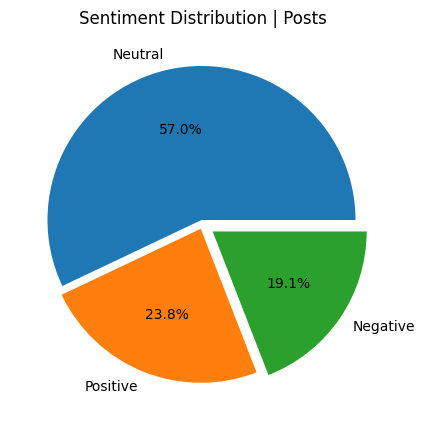

In [29]:
fig = go.Figure(go.Funnelarea(
    text =sentiment_counts_df.Post_Sentiment,
    values = sentiment_counts_df.Count,
    title = {"position": "top center"}
    ))
fig.update_layout(
    title="Funnel-Chart of Sentiment Distribution | Posts",
    title_x=0.5, width=500, height=400)
fig.show()


plt.figure(figsize=(5, 5))
ax = plt.pie(x =post_sentimenet_filtered_df['post_sentiment_category'].value_counts() , labels=post_sentimenet_filtered_df['post_sentiment_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Posts')
plt.show()

***ii. sentiment analysis for post title***

In [30]:
post_self_text_filtered_df = filtered_df[(~filtered_df['clean_post_self_text'].isna())]
# Remove duplicate values from the 'post_title' column , as the one post may be duplicated as it has many comments
post_self_text_filtered_df = post_self_text_filtered_df.drop_duplicates(subset=['post_title'])

# Calc sentiment score for each record
post_self_text_filtered_df['post_sentiment'] = post_self_text_filtered_df['clean_post_self_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
post_self_text_filtered_df['post_sentiment_category'] = post_self_text_filtered_df['post_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the occurrences of each sentiment category
sentiment_counts = post_self_text_filtered_df['post_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Post_Sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,Post_Sentiment,Count
0,Neutral,8218
1,Positive,2784
2,Negative,1426


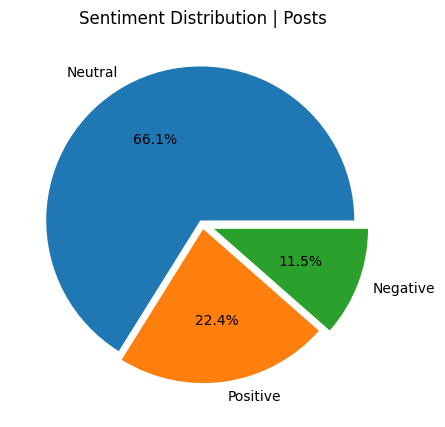

In [31]:
fig = go.Figure(go.Funnelarea(
    text =sentiment_counts_df.Post_Sentiment,
    values = sentiment_counts_df.Count,
    title = {"position": "top center"}
    ))
fig.update_layout(
    title="Funnel-Chart of Sentiment Distribution | Posts",
    title_x=0.5, width=500, height=400)
fig.show()


plt.figure(figsize=(5, 5))
ax = plt.pie(x =post_self_text_filtered_df['post_sentiment_category'].value_counts() , labels=post_sentimenet_filtered_df['post_sentiment_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Posts')
plt.show()

 **Examples of of Positive, Negative, and Neutral posts**

In [32]:
# Neutral posts
post_self_text_filtered_df[
    (post_self_text_filtered_df['post_sentiment_category'] == 'Neutral') &  (post_self_text_filtered_df['post_self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

,post_title,post_self_text,post_sentiment,post_sentiment_category
318633,Our willingness to cause massive damage without the slightest care: Israeli journalist,Archived source of the tweet in case it gets deleted: https://ghostarchive.org/archive/ZTuAW,0.0,Neutral
425088,Strength of Qassam comes from Allah,Glory to the mouqawama !\nOur Heroes ! Our Pride 🇵🇸❤️\n,0.0,Neutral
111637,Resistance leader in a message to Hamas political leaders: we killed and injured 5000 IOF soldiers in Gaza.,Aljazeera news,0.0,Neutral
620238,Law Abiding Citizens Fight Over Misplaced Medication,Of course she had a pack of Newports in her pocket,0.0,Neutral
597540,The existence of Israel is perpetuated by the west so the western powers controll the Suez,Please discuss I simply cannot refute this.,0.0,Neutral


In [33]:
# positive posts
post_self_text_filtered_df[
    (post_self_text_filtered_df['post_sentiment_category'] == 'Positive') &  (post_self_text_filtered_df['post_self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

,post_title,post_self_text,post_sentiment,post_sentiment_category
251207,Why does no one talk about the Arab/Islamic Colonialism?,"I have been following the events and protests that have resulted from the Hamas invasion and massacre in Israel, some of the events that have piqued my interest are the protests in the US. In some of this protest, I have seen a continuing rhetoric of referring to Israel as a colonial power, now my argument isn't that they are true or false but I have also observed that why a lot of Blacks, Arabs, Queers, non-Whites and anti-establishments people. \n\n\nMy question now is, there is a lot of vitriol against historical colonial powers, which is rightly so because of the pain that they caused in history, but why doesn't this extend to Arab Muslims considering the Muslim conquests that enforced Islam across the Arabian Peninsula, the Middle East and North Africa. This particular conquests saw people massacred and cultures erased but why does no one seem to talk about it?",0.029464,Positive
555322,Saudi Arabia Concerts,I’m surprised there’s not much outcry against the concerts in Saudi Arabia whilst Gaza is going through what it’s going. \n\nI’ve never seen such sinful behaviour from a country that is supposedly the custodians of the two holy mosques.,0.150000,Positive
222353,"Logical flaw (?) in the ""Human Shields"" claim","Everyone has heard the widely used ""Hamas is using the Palestinians as human shields"" line. After throughly analysing this statement, a logical flaw presents itself. \nIf the above statement is true, where is the proof that supports it. \n\nFirst, there is no video, audio or transcript that incriminates Hamas. Arguments can be made that Hamas controls the narrative coming out of Gaza, but those arguments would be very weak. There are too many individual reporters along with fairly neutral news agencies, documenting the plight of the Palestinians. Had this statement been true, there would've been atleast a dozen stories and articles about it. That has not been the case so far. This is only a preliminary counter point.\n\n\nThe 'logical flaw' that is in discussion here is about long term politics. This statement paints Hamas as an oppressive military government. A government that cares about the people only as long as they make it to the headlines in a fashion that furthers the Hamas...",0.062745,Positive
565180,People Blaming Israel For Deaths In Gaza Do Not Understand,"People blaming Israel for deaths in Gaza don't understand what a chain of causality is. If someone knows well in advance the negative consequence a particular action will have, by having seen it happen before, and still follows through with that action, everything that happens afterwards is that person's fault.\n\nFor example, a bank robber knows full well that his consequence, should he be caught, will be prison. He knows what that will mean for his family, his children, his parents, his wife, his coworkers. When he commits his crime, and goes to trial, and is convicted, and is sent to prison, who's fault is it?\n\nIs it reasonable, or on the other hand is it ridiculous, for that man to beg the court to let him get off Scott free, based on the suffering of his family in his absence? Is it right for him, or anyone to point at the state and say ""look what the government is doing to this poor family, they are innocent and yet they don't get the financial or emotional support they des...",0.108085,Positive
444300,"Multipolar: why is China cosy towards Iran, which supports Hamas?","An Atlantic article explains the greater increase for conflict in a world with multiple strong military powers. Pax Americana is over, and the US “frittered away” goodwill. \n\nI get that China gets oil from Russia. But why bother supporting Iran: to stick it to the US? I understood why they supported African development: massive amounts of natural resources. But strategically why does this Axis of China/Iran/Hamas/other Arab states work and

In [34]:
# Negative posts
post_self_text_filtered_df[
    (post_self_text_filtered_df['post_sentiment_category'] == 'Negative') &  (post_self_text_filtered_df['post_self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

,post_title,post_self_text,post_sentiment,post_sentiment_category
142554,Another rejected deal,"Hamas has rejected an Israeli\nproposal for a week-long truce in\nGaza in exchange for the release of\nsome 40 hostages, including all\nwomen and children the terror\ngroup still holds, The Wall Street\nJournal reports.\n\nWhen people chant and demand a\nceasefire, they need to be aware that Hamas is the unwilling party. The terrorists that have violated every ceasefire. And the ones that won't surrender and release hostages to end the war. So stop the bull\nreframing of this narrative to force the blame on Jews. It started with Hamas. It ends with Hamas surrendering and releasing hostages.\n\nText above is from Mandana Dayani via IG\n—————————————————-\nI am so disheartened to see this deal did not work out. I was already heartbroken of the idea of ONLY 40 hostages being released out of a potential 129…every day is October 7th for the hostages, and this just means another day after day of heartbreak for the hostages, the innocent children in Palestine, and for people around the wo...",-0.052704,Negative
9330,Have you noticed that the pro Palestine movement has started to like get courrpted by tankies and neonazis.,"I’m not saying I’m pro Israeli I think I srael is kind of being terrible right now.but personally I’ve seen people saying sing Palestine as a excuse to b hamas apologists and be antisemitic under the disguise of Palestine liberation. What did it in for me was when people were harassing an Israeli 18 year old when he refused conscription in protest against what the Israeli army was doing in gaza and got arrested. But then harassed because he was just born in Israel in General.\n\nIf you want to know where I stand I support the idea of a secular state federal republic for Christian’s Jews and Muslims. Like Bosnia and Herzegovina where it is divided between orthodox Serbs, Catholic Croats and Muslim Bosnians.",-0.021429,Negative
283051,I am pro-Palestinian but I prefer to converse with Pro-Israelis.,I noticed that most pro-Palestinians are very emotional when they are discussing this conflict. \nThey won’t accept another opinion other their own. \nThey refuse to look and understand the other side. \nThey don’t won’t criticize their leaders.\n\nMost Israelis will condemn Jewish terrorists like Baruch Goldstein and extremists like Ben Gvir. \n\nPro-Palestinians refuse to condemn Hamas.\n\nPro- Palestinians attack and boycott random business owned by Jews as if every Jew is responsible for Israel. \n\nPro-Israelis 70% of the time will have a civil debate even if you are against them.,-0.075000,Negative
490705,Does this count as IDFwave?,Shit kinda goes hard ngl,-0.245833,Negative
533031,Antisemitism on the rise and bad actors,"Okay i want to preface by saying that I’m pro Palestine, but you guys need to chill the fuck out with the antisemitism. Ever since October 7th, I feel like people forgot that it’s supposed to be anti-Zionism NOT anti-Jewish. Whenever I see comment sections on social media about the conflict, it’s just a cesspool of unrelated comments about zionists controlling the world/USA. Some of you may agree with that, but it’s honestly just blatant antisemitism and completely ignores the imperialist ambitions that the west has in supporting Israel. They do out of their own their own volition, not because it’s some conspiracy of jews controlling the world. Additionally jewish people who aren’t even Israeli seem to get attacked way more online than usual and antisemitic tropes are way more common. Y’all might say I’m tone policing but im really not, some people just seem to have lost the script and think that anti semitism is okay now, which it isn’t. Again, anti-Zionism NOT anti-jewish. \n\nId...",-0.047222,Negative


**Analyzing Sentiment Trends Over Time**

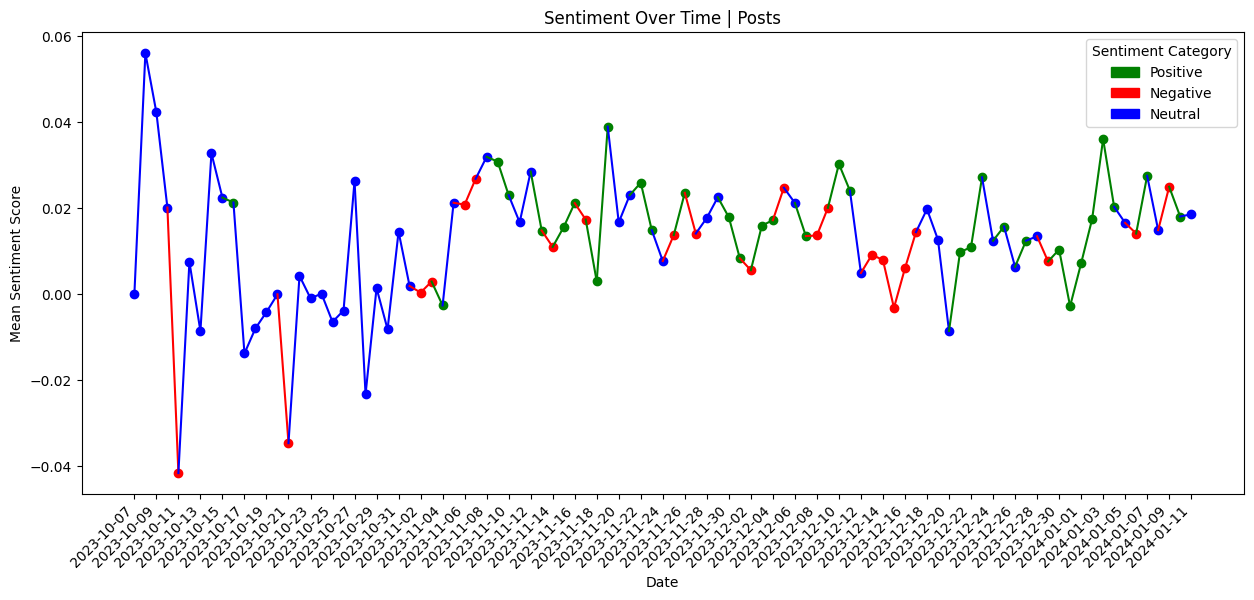

In [35]:
# Create legend patches
positive_patch = mpatches.Patch(color='green', label='Positive')
negative_patch = mpatches.Patch(color='red', label='Negative')
neutral_patch = mpatches.Patch(color='blue', label='Neutral')

# Group by 'created_time' and calculate the mean sentiment for each time period
sentiment_by_time = post_self_text_filtered_df.groupby(post_self_text_filtered_df['post_created_time'].dt.date)['post_sentiment'].mean()

# Replace 'sentiment_scores' with the actual variable or column containing sentiment scores
sentiment_scores = post_self_text_filtered_df['post_sentiment']

# Calculate dynamic thresholds based on percentiles
percentile_25 = np.percentile(sentiment_scores, 25)
percentile_75 = np.percentile(sentiment_scores, 75)

# Classify sentiments based on dynamic thresholds
post_self_text_filtered_df['post_sentiment_category'] = np.where(
    post_self_text_filtered_df['post_sentiment'] < percentile_25, 'Negative',
    np.where( post_self_text_filtered_df['post_sentiment'] > percentile_75, 'Positive','Neutral' ))

# Plot the sentiment over time with lines connecting points and different colors for each category
plt.figure(figsize=(15, 6))

for idx, row in sentiment_by_time.reset_index().iterrows():
    date = row['post_created_time']
    sentiment = post_self_text_filtered_df.loc[post_self_text_filtered_df['post_created_time'].dt.date == date, 'post_sentiment_category'].iloc[0]

    # Assign colors based on sentiment category
    color = 'green' if sentiment == 'Positive' else ('red' if sentiment == 'Negative' else 'blue')

    # Plot the point
    plt.plot(date, row['post_sentiment'], marker='o', color=color)

    # Connect with lines to the previous point
    if idx > 0:
        plt.plot([previous_date, date], [previous_sentiment, row['post_sentiment']], color=color)

    previous_date = date
    previous_sentiment = row['post_sentiment']

# Add legend with colored boxes
plt.legend(handles=[positive_patch, negative_patch, neutral_patch], title='Sentiment Category')
plt.title('Sentiment Over Time | Posts')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')

# Display every other date on x-axis
plt.xticks(sentiment_by_time.index[::2], rotation=45, ha='right')

plt.show()

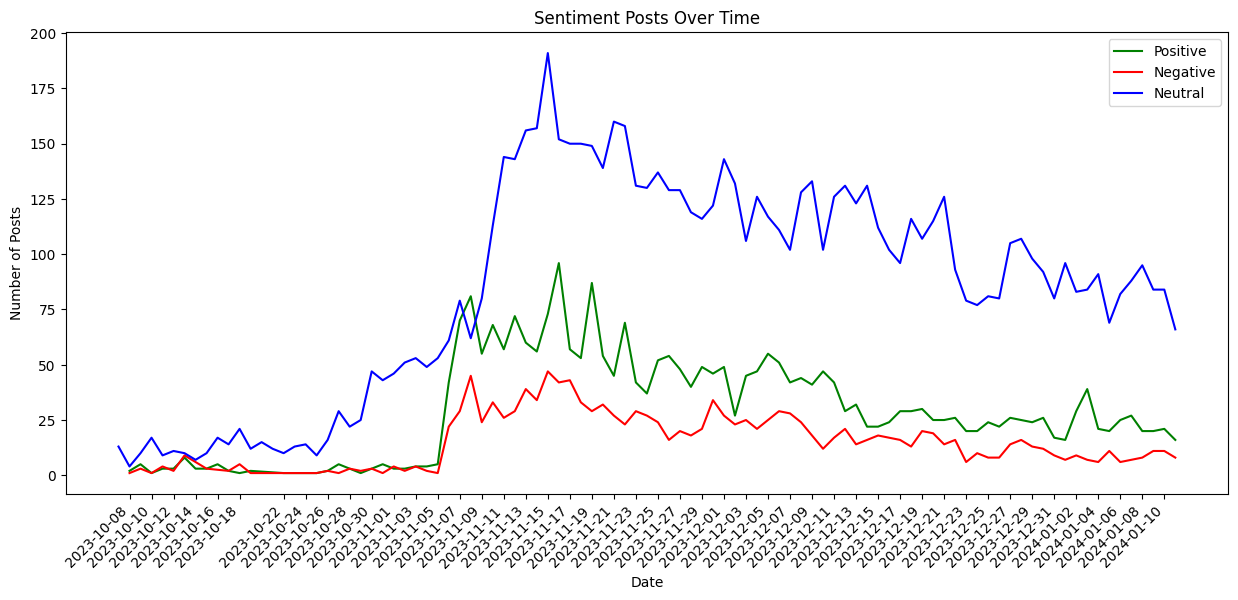

In [36]:
# Filter posts by sentiment category
positive_posts = post_self_text_filtered_df[post_self_text_filtered_df['post_sentiment_category'] == 'Positive']
negative_posts = post_self_text_filtered_df[post_self_text_filtered_df['post_sentiment_category'] == 'Negative']
neutral_posts = post_self_text_filtered_df[post_self_text_filtered_df['post_sentiment_category'] == 'Neutral']

# Group by 'post_created_time' and calculate counts
positive_counts_per_day = positive_posts.groupby(positive_posts['post_created_time'].dt.date).size()
negative_counts_per_day = negative_posts.groupby(negative_posts['post_created_time'].dt.date).size()
neutral_counts_per_day = neutral_posts.groupby(neutral_posts['post_created_time'].dt.date).size()

# Plotting using Seaborn
plt.figure(figsize=(15, 6))

# Plot lines for each sentiment category
sns.lineplot(x=positive_counts_per_day.index, y=positive_counts_per_day.values, label='Positive',  color='green')
sns.lineplot(x=negative_counts_per_day.index, y=negative_counts_per_day.values, label='Negative',  color='red')
sns.lineplot(x=neutral_counts_per_day.index, y=neutral_counts_per_day.values, label='Neutral' , color='blue')

plt.title('Sentiment Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.xticks(positive_counts_per_day.index[::2], rotation=45, ha='right')  # Display every second date for better visibility
plt.show()

# **2. Comments sentiment analysis**

In [37]:
sentiment_filtered_df=filtered_df[(~filtered_df['clean_text'].isna())]
sentiment_filtered_df = sentiment_filtered_df.drop_duplicates(subset=['clean_text'])

sentiment_filtered_df['comment_sentiment'] = sentiment_filtered_df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sentiment_filtered_df['comment_sentiment_category'] = sentiment_filtered_df['comment_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the occurrences of each sentiment category
sentiment_counts_df = pd.DataFrame(sentiment_filtered_df['comment_sentiment_category'].value_counts())
sentiment_counts_df.columns = ['Count']
sentiment_counts_df.index.name = 'comment_sentiment'
sentiment_counts_df.reset_index(inplace=True)
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,comment_sentiment,Count
0,Positive,267486
1,Negative,179935
2,Neutral,174601


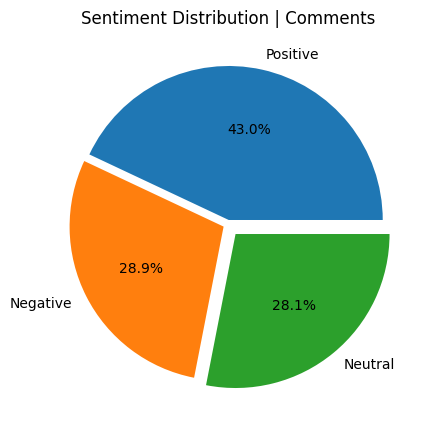

In [38]:
plt.figure(figsize=(5, 5))
ax = plt.pie(x =sentiment_filtered_df['comment_sentiment_category'].value_counts() , labels=sentiment_filtered_df['comment_sentiment_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Comments')
plt.show()

**Examples of Positive, Negative, and Neutral comments individually**

In [39]:
# Neutral comments
sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Neutral'].sample(n=5, random_state=random.seed())[['self_text', 'comment_sentiment', 'comment_sentiment_category']]

,self_text,comment_sentiment,comment_sentiment_category
346173,"As a native English speaker, born and raised in London, UK itself. I have no idea what the hell you’re talking about.",0.0,Neutral
534900,Three fan clubs killing each other over slightly different interpretations of the same character.,0.0,Neutral
41656,"It's Qatar state media. Qatar who, btw, has donated billions to US universities, over $500 million to Harvard alone since 9/11",0.0,Neutral
525011,"This doesn't back up the claim. Basement for laundry services and a C&amp;C facility with tunnels heading out from it are not the same. Not to mention\n\nJULY 21, 2014 11:00 AM\n\nBuried eight paragraphs in, The Post‘s correspondent, William Booth, wrote on July 15:\n\n“At the Shifa Hospital in Gaza City, crowds gathered to throw shoes and eggs at the Palestinian Authority’s health minister, who represents the crumbling ‘unity government’ in the West Bank city of Ramallah. The minister was turned away before he reached the hospital, which has become a de facto headquarters for Hamas leaders, who can be seen in the hallways and offices.”\n\n\n\nhttps://www.algemeiner.com/2014/07/21/washington-post-shifa-hospital-in-gaza-city-has-become-a-de-facto-headquarters-for-hamas-leaders-who-can-be-seen-in-hallways-and-offices/",0.0,Neutral
20028,"for Hydrazine, sell to agricultural fertiliser producers.\n\n&amp;#x200B;\n\nfor Tetroxide? idk sell it back to the Strategic rocket force in a roundabout way?",0.0,Neutral


In [40]:
# Positive comments
sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Positive'].sample(n=5, random_state=random.seed())[['self_text', 'comment_sentiment', 'comment_sentiment_category']]

,self_text,comment_sentiment,comment_sentiment_category
346735,Canada is more then happy to have you.,0.800000,Positive
335946,"&gt;Btw, i know both people... But they are much more than just two.\n\nWhat percentages of each, do you think?\n\n&gt;hightly critical of Israel action\n\nThat nuance between critical of Israeli government actions and ""Globalize the Intifadah""...",0.080000,Positive
105738,"&gt;What is the original language of the ancient Palestinian people?\n\nThe original languages spoken in the region of Palestine before the Arab conquest in the 7th century included Aramaic, Hebrew, and Greek, among others. Arabic became dominant after the Arab conquest.\n\n&amp;#x200B;\n\n&gt;Also the most famous human being to ever exist, Jesus, was apparently Palestinian. Did Jesus speak the original Palestinian language or did he speak Arabic?\n\nJesus, historically, was a Jew living in what is now Israel/Palestine. He most likely spoke Aramaic, a common language in the region at the time, and possibly Hebrew and Greek as well. The term Palestinian in the context of Jesus time doesn't make sense. It is anachronistic.\n\n&amp;#x200B;\n\n&gt; is there some dead Palestinian language that can be brought back to life? \n\nThe languages spoken in ancient Palestine were not unique to that region and are not ""dead"" in the same way as languages like Latin. Hebrew and Aramaic, for exampl...",0.050781,Positive
561604,Average scumraeli brain lmao,0.225000,Positive
104717,"Wrong. Actually not only wrong, outright illegal. \n\nNo one expects Israel ‘to feed’ Gaza, we expect them not to stop food and water from reaching a million innocent kids…. We expect them to not purposely starve a nation as collective punishment…. What is so hard to understand about that? \n\nYou contradicted yourself by saying ‘only an idiot would start a war with someone controlling their food and water supply’. You are correct, Israel does control their food and water supply, something that shouldn’t be the case in the first place… why should Israel have the right to control another countries food and water supply? Ever think about that one? As you admitted, they are in control of another countries food and water supply (they admit so themselves with humanitarian aid even being a part of negotiations) and being in control, they choose to keep food and water from two million people, many of them innocent civilians, over half of those civilians are children…. What I don’t underst...",0.046362,Positive


In [41]:
# Negative comments
sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Negative'].sample(n=5, random_state=random.seed())[['self_text', 'comment_sentiment', 'comment_sentiment_category']]

,self_text,comment_sentiment,comment_sentiment_category
486201,"I found this post helpful,so I will. Hard to find and compare info about the same claim from different sources. Thanks",-0.030556,Negative
66455,"Did I say the lives of those who died does not matter?!!!!\n\nI'm saying as a whole I think Palestine will rise again.\n\nWhat propaganda? I am actually from the middle east, my country: Syria is also destroyed! I'm myself with all my relatives are displaced. I still believe Syria will rise up even if we all die. It seems your individualistic view of the world blinds you to the whole picture \n\nPeace out!",-0.033333,Negative
497472,Mad respect. \n\nFuck terrorists.,-0.512500,Negative
608707,"This is so stupid. It's not because of religion.\nThe world ""hates"" Israel because of the amount of killing and the hypocrisy of the government. It's about the lack of human decency in Israel's government.",-0.533333,Negative
610721,"It's far from being dead. 2 or 3 states are the only option. The 1967 line idea died after 2005 and especially after 10/7, but still. A two state solution is must. \n\n10/7 might have pushed it years. However, due to lack of confidence.",-0.056250,Negative


**Analyzing comments Trends Over Time**

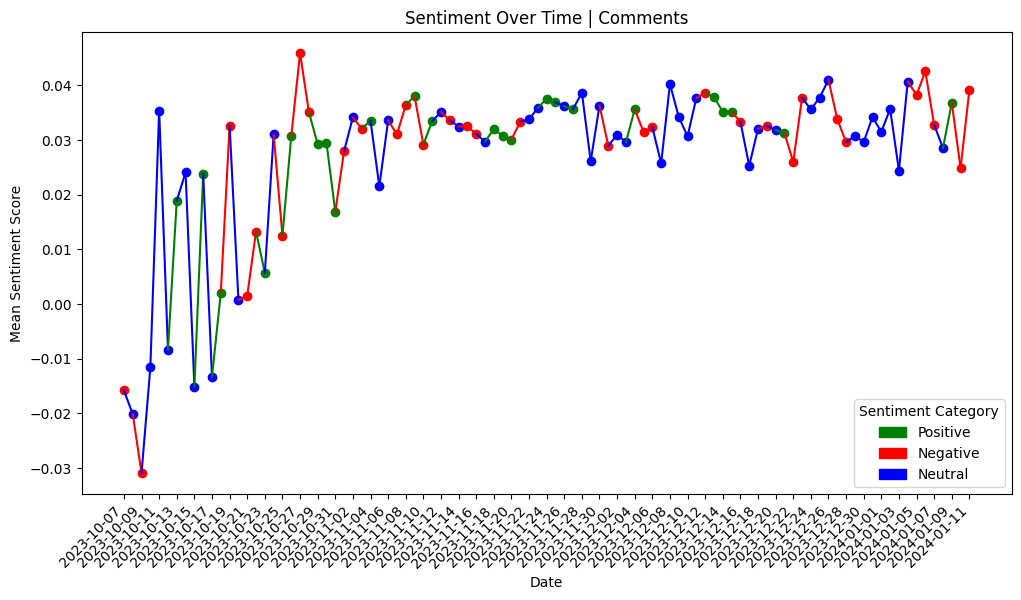

In [42]:
# Group by 'created_time' and calculate the mean sentiment for each time period
sentiment_by_time = sentiment_filtered_df.groupby(sentiment_filtered_df['created_time'].dt.date)['comment_sentiment'].mean()

# Replace 'sentiment_scores' with the actual variable or column containing sentiment scores
sentiment_scores = sentiment_filtered_df['comment_sentiment']

# Calculate dynamic thresholds based on percentiles
percentile_25 = np.percentile(sentiment_scores, 25)
percentile_75 = np.percentile(sentiment_scores, 75)

# Classify sentiments based on dynamic thresholds
sentiment_filtered_df['comment_sentiment_category'] = np.where(
    sentiment_filtered_df['comment_sentiment'] < percentile_25, 'Negative',
    np.where(
        sentiment_filtered_df['comment_sentiment'] > percentile_75, 'Positive',
        'Neutral'
    )
)

# Plot the sentiment over time with lines connecting points and different colors for each category
plt.figure(figsize=(12, 6))

for idx, row in sentiment_by_time.reset_index().iterrows():
    date = row['created_time']
    sentiment = sentiment_filtered_df.loc[sentiment_filtered_df['created_time'].dt.date == date, 'comment_sentiment_category'].iloc[0]

    # Assign colors based on sentiment category
    color = 'green' if sentiment == 'Positive' else ('red' if sentiment == 'Negative' else 'blue')

    # Plot the point
    plt.plot(date, row['comment_sentiment'], marker='o', color=color)

    # Connect with lines to the previous point
    if idx > 0:
        plt.plot([previous_date, date], [previous_sentiment, row['comment_sentiment']], color=color)

    previous_date = date
    previous_sentiment = row['comment_sentiment']

# Add legend with colored boxes
plt.legend(handles=[positive_patch, negative_patch, neutral_patch], title='Sentiment Category')
plt.title('Sentiment Over Time | Comments')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')

# Display every other date on x-axis
plt.xticks(sentiment_by_time.index[::2], rotation=45, ha='right')

plt.show()

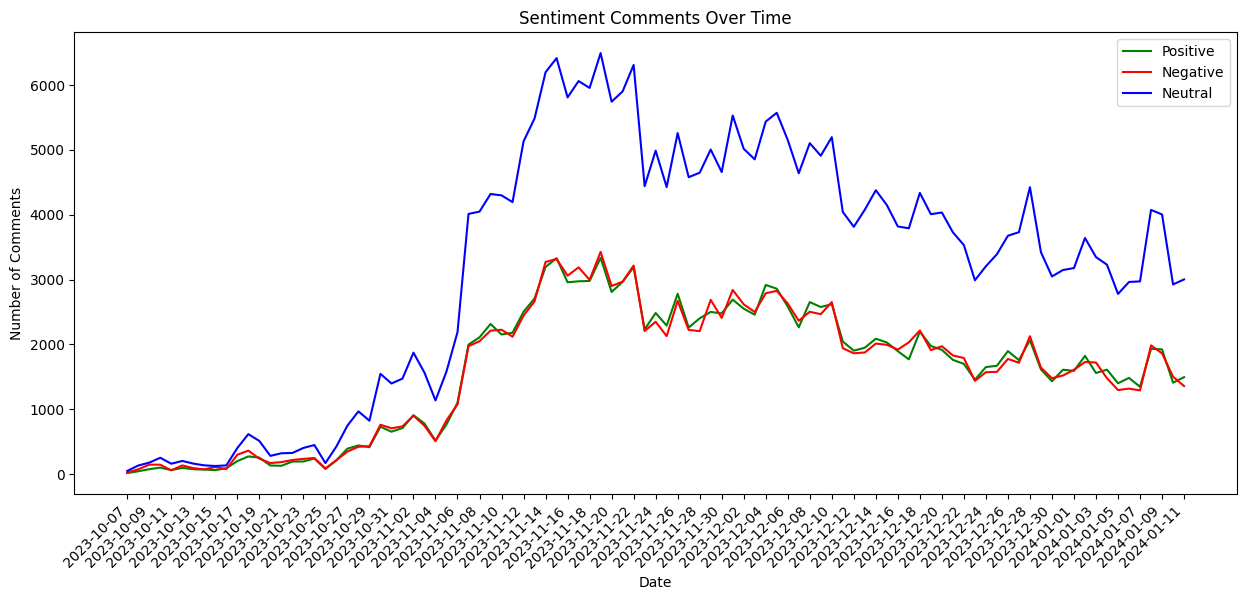

In [43]:
# Filter comments by sentiment category
positive_comment = sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Positive']
negative_comment = sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Negative']
neutral_comment = sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Neutral']

# Group by 'post_created_time' and calculate counts
positive_counts_per_day = positive_comment.groupby(positive_comment['created_time'].dt.date).size()
negative_counts_per_day = negative_comment.groupby(negative_comment['created_time'].dt.date).size()
neutral_counts_per_day = neutral_comment.groupby(neutral_comment['created_time'].dt.date).size()

plt.figure(figsize=(15, 6))

# Plot lines for each sentiment category
sns.lineplot(x=positive_counts_per_day.index, y=positive_counts_per_day.values, label='Positive',  color='green')
sns.lineplot(x=negative_counts_per_day.index, y=negative_counts_per_day.values, label='Negative',  color='red')
sns.lineplot(x=neutral_counts_per_day.index, y=neutral_counts_per_day.values, label='Neutral' , color='blue')

plt.title('Sentiment Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()
plt.xticks(positive_counts_per_day.index[::2], rotation=45, ha='right')  # Display every second date for better visibility
plt.show()

# EDA for the Dataset


In [44]:
filtered_df['post_created_time'] = pd.to_datetime(filtered_df['post_created_time'])

# Calculate date difference
date_difference = filtered_df['post_created_time'].max() - filtered_df['post_created_time'].min()

# Calculate years, months, and days
years = date_difference.days // 365
months = (date_difference.days % 365) // 30
days = (date_difference.days % 365) % 30

result = f"Data covers a period of {years} years, {months} months, {days} days, \nfrom {filtered_df['post_created_time'].min().date()} till {filtered_df['post_created_time'].max().date()}"
print(result)
print(filtered_df.shape)

Data covers a period of 0 years, 3 months, 6 days, 
from 2023-10-07 till 2024-01-11
(655483, 26)


## Highest post score & comment

In [45]:
pd.DataFrame(filtered_df.loc[filtered_df['post_score'].idxmax()][[ 'post_title', 'post_score', 'subreddit', 'post_created_time']]).T

,post_title,post_score,subreddit,post_created_time
217175,"IDF soldier kills a Hamas man in a nearby room, gets hit from a hand grenade, gets up and kills a 2nd Hamas man",27961,CombatFootage,2023-12-12 18:04:20


In [46]:
pd.DataFrame(filtered_df.loc[filtered_df['score'].idxmax()][['self_text', 'post_title', 'score', 'subreddit', 'created_time']]).T

,self_text,post_title,score,subreddit,created_time
190585,"&gt;“They’re all without shirts and they have a stick with a white cloth on it. The soldier feels threatened and opens fire. He declares that they’re terrorists, they (forces) open fire, two are killed immediately,” said the military official. The third hostage was wounded and retreated into a nearby building where he called for help in Hebrew, the official said. “Immediately the battalion commander issues a ceasefire order, but again there’s another burst of fire towards the third figure and he also dies,” said the official\n\nThey shot dead two unarmed people holding a white flag and still pursued the third. Commander only told them to stop after he heard Hebrew.\n\nIf these were Palestinian civilians they would have been marked down as Hamas terrorists being eliminated","IDF: Hostages were shirtless, waving white flag when soldiers opened fire",11807,worldnews,2023-12-16 13:27:15


## Total Authors

In [47]:
print("Number of unique authors:",  filtered_df['author_name'].nunique())


Number of unique authors: 115934


### Correlation Analysis between scores, karma, upvotes/downvotes, and user_total_karma to identify patterns.

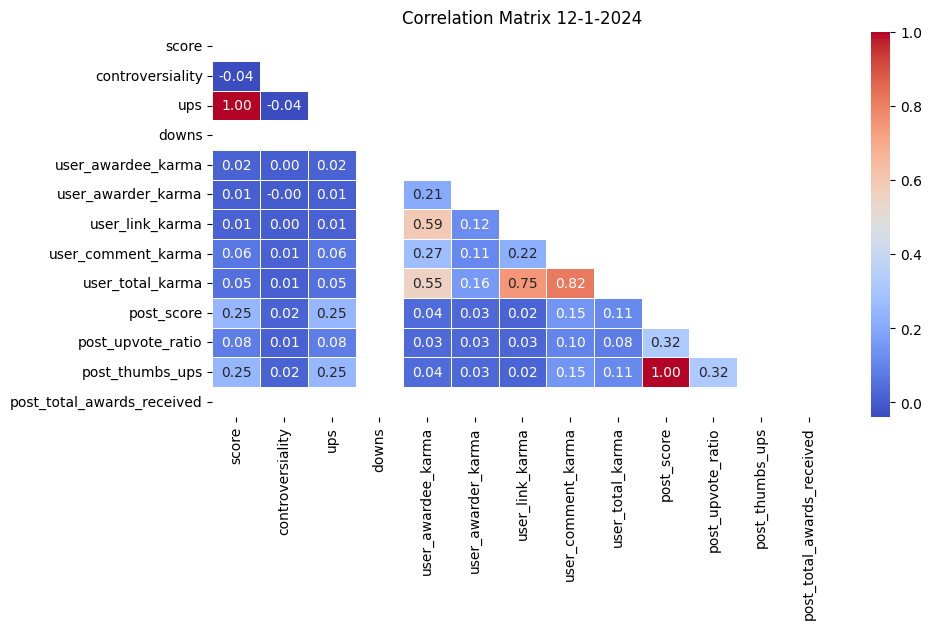

In [49]:
# Select numerical features for correlation analysis
numerical_columns = filtered_df.select_dtypes(include='number').columns

# Create a subset DataFrame with selected features
correlation_df = filtered_df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Correlation Matrix 12-1-2024')
plt.show()

🍉 Insights 🍉

From the provided correlation matrix, we can see that:

1. High Correlation (0.75)to(1.0):

* the columns "post_thumbs_ups" and "post_score" also have a perfect positive correlation (1.0), suggesting redundancy. We may choose to keep "post_score".
* Similarly but with a lower score, the columns "user_total_karma" and "user_comment_karma" also have a high positive correlation (0.82), suggesting redundancy. We choose to drop "user_comment_karma".
* In addition to another high positive correlation (0.75). we choose to drop "user_link_karma", and keep"user_total_karma".

2. medium Correlations:

* User_awardee_karma, user_total_karma have a moderate positive correlation, suggesting that users who write comments are also likely to takes awards.
3. Columns with lowest Correlation:

* The column "downs"has lowest correlation with other features, indicating no linear relationship. We consider dropping "downs" as it does not contribute meaningfully to our analysis

In [50]:
filtered_df[['post_thumbs_ups','post_score','user_total_karma','user_comment_karma','user_link_karma','downs']]

,post_thumbs_ups,post_score,user_total_karma,user_comment_karma,user_link_karma,downs
0,147,147,90478.0,74226.0,16214.0,0
1,0,0,161.0,12.0,149.0,0
...,...,...,...,...,...,...
655520,3151,3151,47783.0,33923.0,11727.0,0
655524,43,43,6.0,5.0,1.0,0


### droping the unmeaningful features from the correlation analysis 

In [51]:
filtered_df= filtered_df.drop(columns=['downs','post_thumbs_ups','user_comment_karma','user_link_karma'])
filtered_df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'user_is_verified',
       'user_account_created_time', 'user_awardee_karma', 'user_awarder_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_total_awards_received', 'post_created_time',
       'clean_text', 'clean_post_self_text'],
      dtype='object')

In [52]:
filtered_df.dtypes

comment_id                            object
score                                  int64
self_text                             object
subreddit                             object
created_time                  datetime64[ns]
post_id                               object
author_name                           object
controversiality                       int64
ups                                    int64
user_is_verified                      object
user_account_created_time     datetime64[ns]
user_awardee_karma                   float64
user_awarder_karma                   float64
user_total_karma                     float64
post_score                             int64
post_self_text                        object
post_title                            object
post_upvote_ratio                    float64
post_total_awards_received             int64
post_created_time             datetime64[ns]
clean_text                            object
clean_post_self_text                  object
dtype: obj

# Descriptive Statisics

In [53]:
# Descriptive statistics for numerical features
filtered_df.describe().T

,count,mean,min,25%,50%,75%,max,std
score,655483.0,18.77492,-980.0,1.0,2.0,9.0,11807.0,116.977564
created_time,655483,2023-12-03 21:50:17.880352768,2023-10-07 05:50:20,2023-11-17 23:04:26,2023-12-02 17:14:20,2023-12-19 16:35:16,2024-01-11 21:04:43,NaN
controversiality,655483.0,0.065202,0.0,0.0,0.0,0.0,1.0,0.246883
ups,655483.0,18.77492,-980.0,1.0,2.0,9.0,11807.0,116.977564
user_account_created_time,638804,2019-10-10 12:22:30.325246464,2005-08-05 04:00:00,2017-09-08 07:27:15,2020-10-23 21:13:46.500000,2022-09-11 18:04:03,2024-01-11 19:21:26,NaN
user_awardee_karma,655412.0,387.93814,0.0,0.0,20.0,218.0,976452.0,3095.034571
user_awarder_karma,655412.0,165.013663,0.0,0.0,0.0,19.0,232891.0,1488.468469
user_total_karma,655412.0,43038.17299,-99.0,1543.0,8702.0,34129.0,8314757.0,146443.612075
post_score,655483.0,1231.073184,0.0,36.0,214.0,1458.0,27961.0,2354.114693
post_upvote_ratio,655483.0,0.787276,0.05,0.71,0.84,0.92,1.0,0.179065


In [54]:
# Descriptive statistics for categorical features
filtered_df.describe(include='object').T

,count,unique,top,freq
comment_id,655483,655483,khf3zhu,1
self_text,655480,641324,Yes,238
subreddit,655483,14,IsraelPalestine,244738
post_id,655483,12912,1849rzo,545
author_name,655483,115934,[deleted],2492
user_is_verified,655481,2,True,638562
post_self_text,309644,4944,"Discussion is going to be centralized here.\n\nModeration will be tight - rule breaking, name calling, racism, etc will result in permanent ban.",966
post_title,655483,12428,/r/WorldNews Live Thread for 2023 Israel-Hamas Crisis (Thread 42),545
clean_text,655483,622022,,6490
clean_post_self_text,655483,4750,,347897


### exploring isrealpalestine Subreddit comments overtime

In [55]:
popular_subreddits = filtered_df['subreddit'].value_counts()
popular_subreddits.columns=['subreddit', 'count']
popular_subreddits

subreddit
IsraelPalestine          244738
worldnews                126207
Palestine                 60750
AskMiddleEast             58651
CombatFootage             51600
PublicFreakout            37581
worldnewsvideo            24790
NonCredibleDefense        23163
IsrealPalestineWar_23     13617
CrazyFuckingVideos         6931
TerrifyingAsFuck           2991
ActualPublicFreakouts      2244
NoahGetTheBoat             1208
AbruptChaos                1012
Name: count, dtype: int64

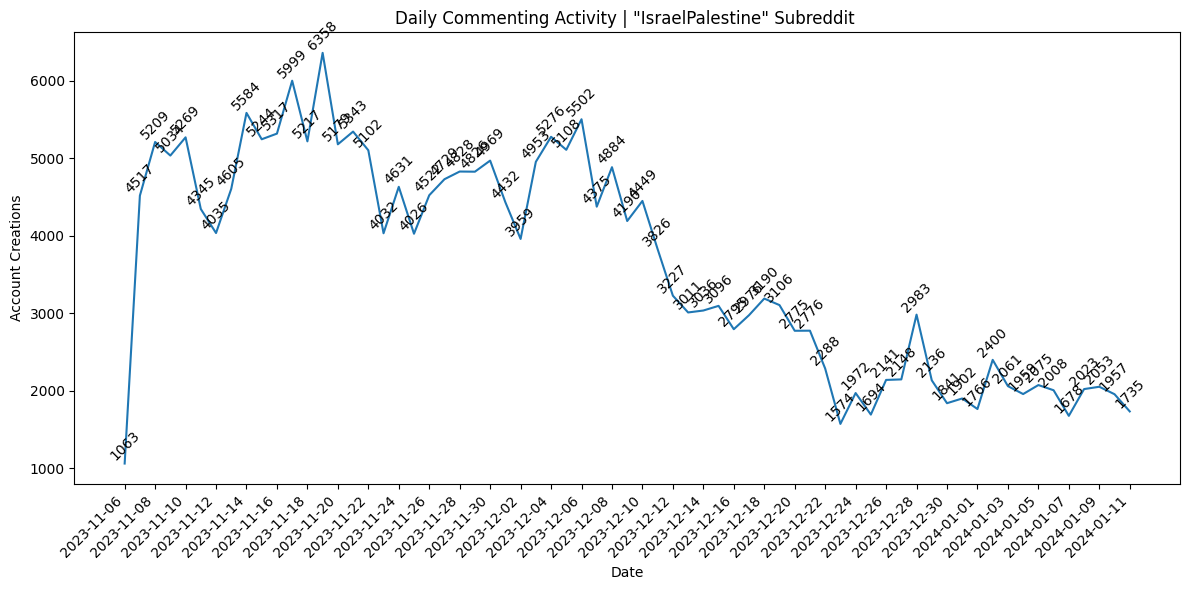

In [56]:
# Filter DataFrame for 'IsraelPalestine' subreddit
filtered_df_israel_palestine = filtered_df[filtered_df['subreddit'] == 'IsraelPalestine']

# Drop duplicates based on 'author_name' and 'user_account_created_time'
filtered_df_unique = filtered_df_israel_palestine.drop_duplicates(subset=['author_name', 'self_text'], keep='first')

filtered_df_unique['created_time'] = pd.to_datetime(filtered_df_unique['created_time']).dt.date

# Get the dates with the most account creations
top_dates = filtered_df_unique['created_time'].value_counts()

# Create a DataFrame from the top dates
top_dates_df = pd.DataFrame({'Date': top_dates.index, 'Account_Creations': top_dates.values})

# Sort the DataFrame by date
top_dates_df = top_dates_df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x='Date', y='Account_Creations', data=top_dates_df, palette='viridis')

# Add labels to the data points
for x, y in zip(top_dates_df['Date'], top_dates_df['Account_Creations']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, rotation=45)

# Set the x-axis tick labels
date_ticks = top_dates_df['Date'][::2]  # Display every second date
plt.xticks(date_ticks, rotation=45, ha='right')

plt.title('Daily Commenting Activity | "IsraelPalestine" Subreddit ')
plt.xlabel('Date')
plt.ylabel('Account Creations')
plt.tight_layout()
plt.show()

## 🍉 Insights 🍉

The Earliest Comment Activity:
* Notably, "IsraelPalestine"  started in early November.

Top Day of highest comment rate:

* It's intriguing to observe that "Israelpalestine" subreddit experienced peaks in commenting around mid-November.
* "IsraelPalestine" stands out as having the highest total number of comments on its top day, reaching approximately +6359 comments on November 19, 2023.

Day with the Lowest Comment Rate:

* On November 6, 2023, the 'IsraelPalestine' subreddit experienced the lowest commenting rate, which is the first day for this Subreddit commuiny, with around 1063 comments.

Consistency and Variability:

* The data shows varying levels of commenting activity throughout the period, with fluctuations in comments creations. Yet a notable consistency is observed during mid-November, where the subreddit maintained a relatively high level of commenting activity over several consecutive days.

Decrease in Engagement:

* The gradual decline in comments towards the end of the dataset, especially from lately December, indicates a decrease in engagement.

### Exploring the Most Engaging Subreddit | IsraelPalestine

In [57]:
# Count unique active users in the 'IsraelPalestine' subreddit
unique_users_count = filtered_df[filtered_df['subreddit'] == 'IsraelPalestine']['author_name'].nunique()
display(HTML(f"<h3>Number of unique users in IsraelPalestine subreddit: <b style='color:red'>{unique_users_count}</b></h3>"))

In [58]:
# Filter posts related to 'IsraelPalestine' subreddit
posts_israel_palestine = filtered_df[(filtered_df['subreddit'] == 'IsraelPalestine') & (filtered_df['post_self_text'].notnull())]
# Drop duplicate posts
unique_posts = posts_israel_palestine.drop_duplicates(subset='post_self_text')
posts_count = len(unique_posts)
display(HTML(f"<h3>Number of unique posts in IsraelPalestine subreddit : <b style='color:red'>{posts_count}</b></h3>"))

In [59]:
# Filter comments related to 'IsraelPalestine' subreddit
comments_israel_palestine = filtered_df[(filtered_df['subreddit'] == 'IsraelPalestine') & (filtered_df['self_text'].notnull())]
# Drop duplicate comments
unique_comments = comments_israel_palestine.drop_duplicates(subset='self_text')
# Get the counts
comments_count = len(unique_comments)
display(HTML(f"<h3>Number of unique comments in IsraelPalestine subreddit : <b style='color:red'>{comments_count}</b></h3>"))

In [60]:
# Find the earliest post_created_time and corresponding post_self_text
earliest_post = posts_israel_palestine.loc[posts_israel_palestine['post_created_time'].idxmin()]
earliest_post_time = earliest_post['post_created_time']
earliest_post_text = earliest_post['post_self_text']
display(HTML(f"<h4>Earliest post created time : <b style='color:red'>{earliest_post_time}</b></h4>"))
display(HTML(f"<h4>Earliest post : <b style='color:red'>{earliest_post_text}</b></h4>"))
horizontal_line= '<hr style="border: none; background-color: #000000; height: 1px; margin: 5px 0;">'

display(HTML(horizontal_line))

last_post = posts_israel_palestine.loc[posts_israel_palestine['post_created_time'].idxmax()]
last_post_time = last_post['post_created_time']
last_post_text = last_post['post_self_text']
display(HTML(f"<h4>Last post created time : <b style='color:red'>{last_post_time}</b></h4>"))
display(HTML(f"<h4>Last post : <b style='color:red'>{last_post_text}</b></h4>"))

### WORDCLOUD OF COMMENTS

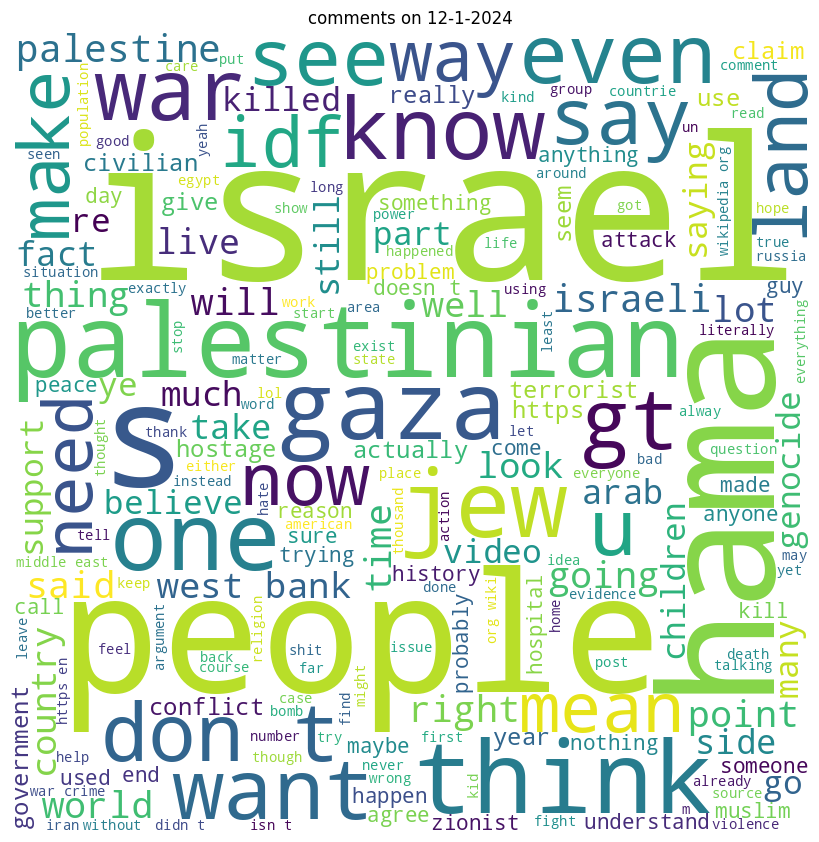

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'post_created_time' and 'post_self_text' are columns in israel_palestine_df
comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the DataFrame rows
for index, row in sentiment_filtered_df.iterrows():
    # Concatenate 'post_self_text' values
    val = str(row['self_text'])
    
    # Split the value into tokens
    tokens = val.split()

    # Convert each token to lowercase
    tokens = [token.lower() for token in tokens]

    # Join the lowercase tokens
    comment_words += " ".join(tokens) + " "

# Generate WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("comments on 12-1-2024")
plt.show()

### Trends Period

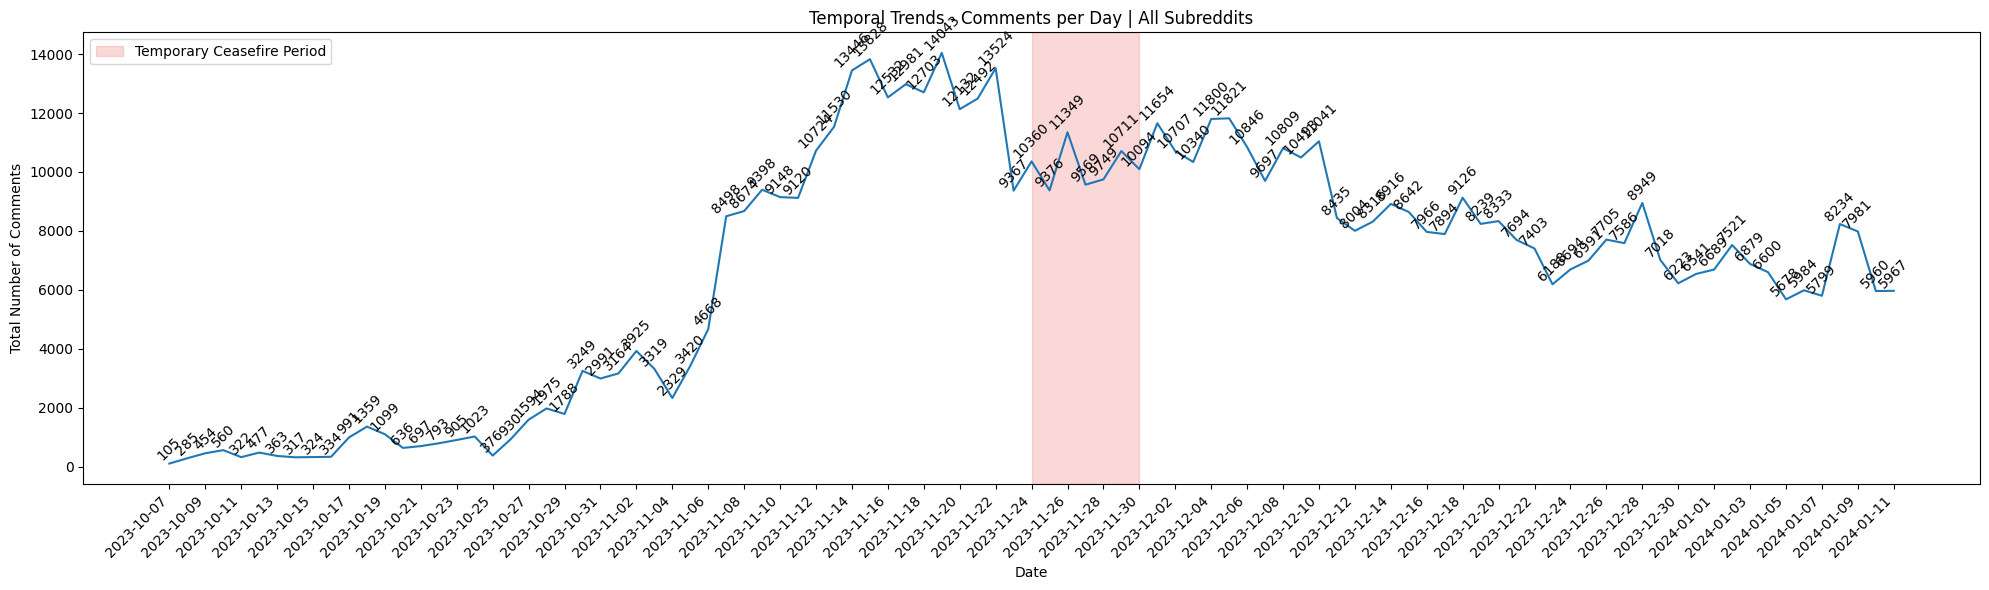

In [63]:
filtered_df_unique = filtered_df.copy()

filtered_df_unique['created_time'] = pd.to_datetime(filtered_df_unique['created_time']).dt.date

# Get the dates with the most account creations
top_dates = filtered_df_unique['created_time'].value_counts()

# Create a DataFrame from the top dates
top_dates_df = pd.DataFrame({'Date': top_dates.index, 'Comment_Creations': top_dates.values})

# Sort the DataFrame by date
top_dates_df = top_dates_df.sort_values(by='Date')

# Plotting using Seaborn
plt.figure(figsize=(20,6))
lineplot = sns.lineplot(x='Date', y='Comment_Creations', data=top_dates_df, palette='viridis')

# Add labels to the data points
for x, y in zip(top_dates_df['Date'], top_dates_df['Comment_Creations']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, rotation=45)

# Set the x-axis tick labels
date_ticks = top_dates_df['Date'][::2]  # Display every second date
plt.xticks(date_ticks, rotation=45, ha='right')

# Highlight the time period from 24 November 2023 to 30 November 2023 in a different color
highlight_start_date = pd.Timestamp('2023-11-24')
highlight_end_date = pd.Timestamp('2023-11-30')

lineplot.axvspan(highlight_start_date, highlight_end_date, color='lightcoral', alpha=0.3, label='Temporary Ceasefire Period')


plt.title('Temporal Trends - Comments per Day | All Subreddits')
plt.xlabel('Date')
plt.ylabel('Total Number of Comments')
plt.legend( title_fontsize='12', loc='upper left')
plt.tight_layout()
plt.show()

### Ceasefire Impact:

* There is a noticeable decline in the number of comments from November 24th to November 30th, possibly due to the announced ceasefire during that period. This decline aligns with a decrease in commenting activity.

In [64]:
# Assuming 'post_created_time' is a datetime column in israel_palestine_df
filtered_df['post_created_time'] = pd.to_datetime(filtered_df['post_created_time'])

# Group by date and count the number of posts for each day
filtered_df.groupby(filtered_df['post_created_time'].dt.date)['post_self_text'].count()

post_created_time
2023-10-07       0
2023-10-08      27
              ... 
2024-01-10    2834
2024-01-11     972
Name: post_self_text, Length: 97, dtype: int64

# 🍉 Analysis

Total occurrences of 🍉 emoji: 140.0


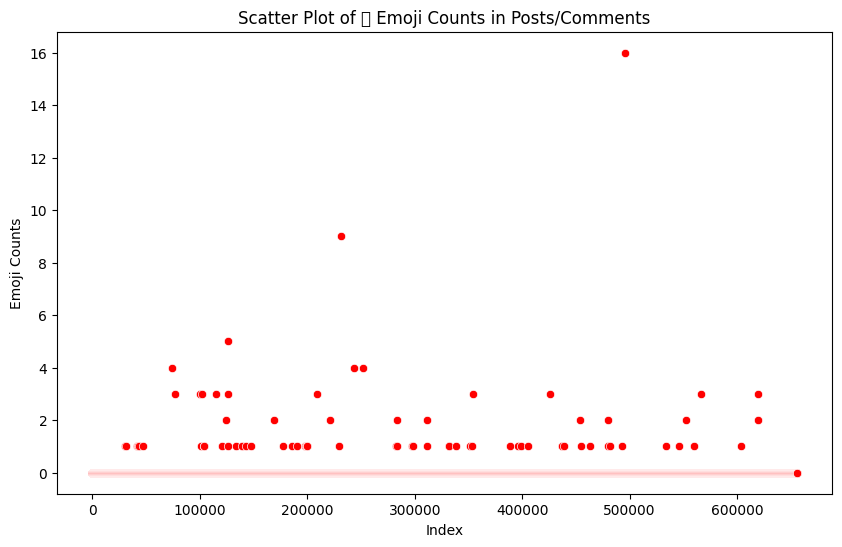

In [65]:
# Assuming 'self_text' is the column containing posts/comments in your DataFrame
emoji = '🍉'
emoji_counts = filtered_df['self_text'].str.count(emoji)

# Create a new column in the DataFrame with the counts
filtered_df['emoji_counts'] = emoji_counts

# Sum the counts to get the total occurrences
total_occurrences = emoji_counts.sum()

# Print the total occurrences
print(f'Total occurrences of 🍉 emoji: {total_occurrences}')

# Plot a bar chart with color gradient to visualize the occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df.index, y=filtered_df['emoji_counts'], color='red')
plt.xlabel('Index')
plt.ylabel('Emoji Counts')
plt.title('Scatter Plot of 🍉 Emoji Counts in Posts/Comments')
plt.show()

In [66]:
# Assuming 'self_text' is the column containing posts/comments in your DataFrame
emoji = '🍉'
emoji_counts = filtered_df['self_text'].str.count(emoji)

# Create a new column in the DataFrame with the counts
filtered_df['emoji_counts'] = emoji_counts

# Sum the counts to get the total occurrences
total_occurrences = emoji_counts.sum()

# Print the total occurrences
print(f'Total occurrences of 🍉 emoji: {total_occurrences}')

# Filter rows where the emoji count is greater than 0
comments_with_emoji = filtered_df[emoji_counts > 0]

# Iterate over the DataFrame and print occurrences
for index, row in comments_with_emoji.iterrows():
    print(f'Index {index}: {row["self_text"]}')

# Plot a bar chart to visualize the occurrences
# Your plotting code goes here

Total occurrences of 🍉 emoji: 140.0
Index 30105: I didn’t think zionists are so butthurt about watermelon 🍉 symbolized the Palestine Resistance lmao 😭
Index 31486: Poor guy has lost many of his family members got gravely injured and his co worker Abu Daqqa was killed in the same incident and now has lost his son 😭🍉
Index 41354: &gt;I have read a handful of the zionist comments. First off it is not Israel, it is Occupied Palestine. You can't have a healthy conversation until you acknowledge that.

This rightly invites full dismissal of anything you have to say. As of this moment, there is no Palestine to occupy. You can’t have a healthy conversation until you acknowledge that.

&gt;The oppressors have tried to sell the narrative that because they suffered the Holocaust that they are above all the international laws. They can steal another people's land by saying it was given to them by GOD. 

The former ruling class is trying to sell the narrative that they are simply oppressed victims,

Total occurrences of each emoji: 🍉_counts      140.0
🇵🇸_counts    1244.0
dtype: float64


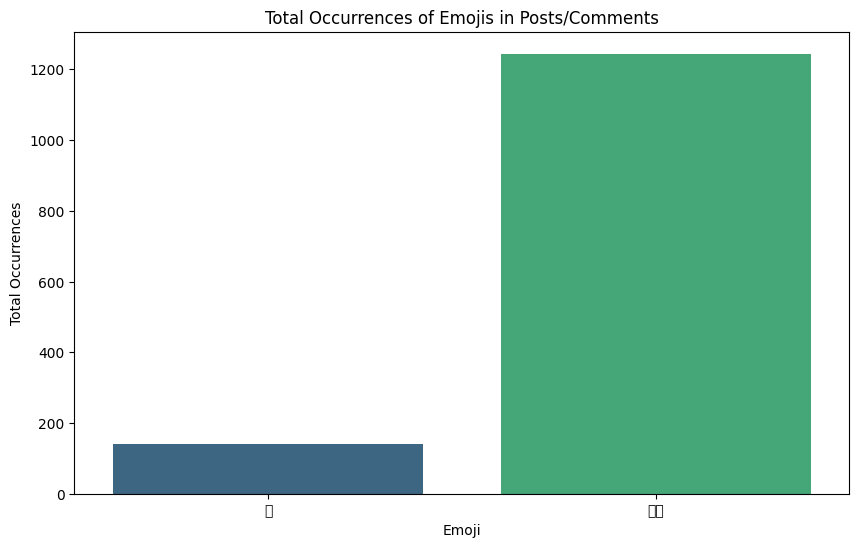

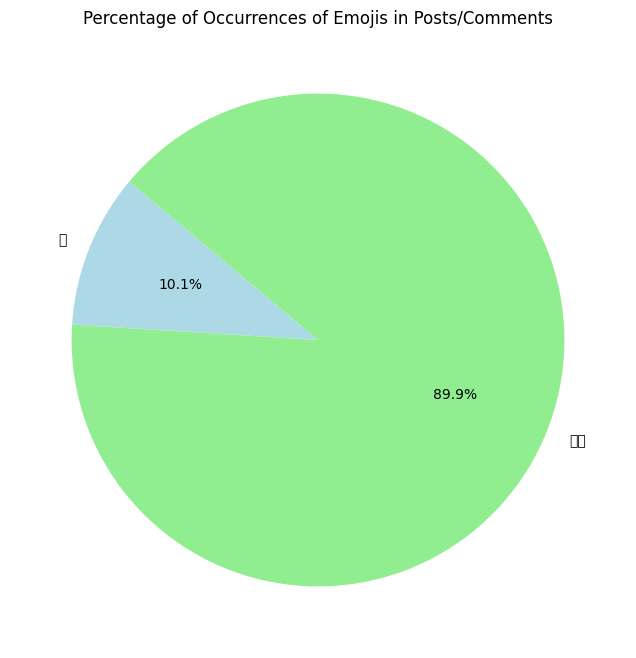

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'self_text' is the column containing posts/comments in your DataFrame
emojis_to_count = ['🍉', '🇵🇸']  # 🇵🇸 represents the Palestinian flag emoji

# Create a new column in the DataFrame for each emoji count
for emoji in emojis_to_count:
    emoji_counts = filtered_df['self_text'].str.count(emoji)
    filtered_df[f'{emoji}_counts'] = emoji_counts

# Sum the counts for each emoji to get the total occurrences
total_occurrences = filtered_df[[f'{emoji}_counts' for emoji in emojis_to_count]].sum()

# Display the total occurrences of each emoji
print(f'Total occurrences of each emoji: {total_occurrences}')

# Plot a bar chart to visualize the occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=emojis_to_count, y=total_occurrences.values, palette='viridis')
plt.xlabel('Emoji')
plt.ylabel('Total Occurrences')
plt.title('Total Occurrences of Emojis in Posts/Comments')
plt.show()
for emoji in emojis_to_count:
    emoji_counts = filtered_df['self_text'].str.count(emoji)
    filtered_df[f'{emoji}_counts'] = emoji_counts

# Sum the counts for each emoji to get the total occurrences
total_occurrences = filtered_df[[f'{emoji}_counts' for emoji in emojis_to_count]].sum()


# Plot a pie chart to visualize the occurrences
plt.figure(figsize=(8, 8))
plt.pie(total_occurrences, labels=emojis_to_count, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Occurrences of Emojis in Posts/Comments')
plt.show()

# **geopolitical determination**

Identify Author Locations
Reddit, a predominantly anonymous community, faces challenges in discerning the geographical locations of its users. While Reddit has access to users' IP addresses, this information remains undisclosed to the public.

An effective strategy involves recognizing that user activity, particularly engagement through comments, tends to peak from 12:00 to 21:00 UTC. By leveraging this temporal pattern, we can make a tentative inference about a user's likely country or region based on their prevalent posting times.

To achieve this, we will follow these steps:

1. Extract the hour component from the `created_time` column.
2. Aggregate the data by `author_name` and compute the mean hour for each user.
3. Utilize the mean hour to estimate the probable time zone associated with each user.
4. Summarize the count of users within each estimated time zone.

In [68]:
# Extract hour from 'created_time'
filtered_df['hour'] = filtered_df['created_time'].dt.hour

# Group by 'author_name' and calculate the mean hour
df_users = filtered_df.groupby('author_name')['hour'].mean().reset_index()

# Function to estimate timezone from mean hour
def estimate_timezone(hour):
    '''
    estimate_timezone function takes the mean hour as input and estimates the timezone based on the assumption that the most active time
    is between 12:00 - 21:00 local time. The function then calculates the difference (local_hour) between the mean hour and 12,and constructs
    a string in the format "UTC{local_hour:+03d}:00". This string represents the estimated timezone with a UTC offset.

    For example:
    If the mean hour is 15, then local_hour would be 3, and the returned timezone would be "UTC+03:00".
    If the mean hour is 9, then local_hour would be -3, and the returned timezone would be "UTC-03:00".
    This way, you're expressing the timezone as a UTC offset relative to UTC time.
    '''
    # Assuming most active time is between 12:00 - 21:00 local time
    local_hour = int (hour - 12)
    return f"UTC{local_hour:+03d}:00"

# Apply the timezone estimation function
df_users['estimated_timezone'] = df_users['hour'].apply(estimate_timezone)

# Count the number of users in each estimated timezone
timezone_distribution = df_users['estimated_timezone'].value_counts()
timezone_distribution

estimated_timezone
UTC+00:00    9963
UTC+02:00    7614
UTC+03:00    7385
UTC+01:00    7227
UTC+04:00    7221
UTC+05:00    6704
UTC+06:00    6208
UTC+07:00    5630
UTC-01:00    5404
UTC+08:00    5120
UTC-02:00    4633
UTC+09:00    4586
UTC+10:00    4110
UTC-03:00    3968
UTC-04:00    3578
UTC-05:00    3222
UTC+11:00    3089
UTC-09:00    3059
UTC-06:00    2994
UTC-10:00    2927
UTC-11:00    2891
UTC-07:00    2840
UTC-08:00    2839
UTC-12:00    2722
Name: count, dtype: int64

In [69]:
#Aggregate the data by author_name and compute the mean hour for each user.
filtered_df.groupby('author_name')['hour'].mean().reset_index()

,author_name,hour
0,-------7654321,19.333333
1,------_---__-Sad,19.333333
...,...,...
115932,zzzongdude,23.000000
115933,zzzthelastuser,12.000000


In [70]:
# Get a list of time zones
time_zones = pytz.all_timezones

# Create a mapping of UTC offsets to countries
utc_region_mapping = defaultdict(list)

for time_zone in time_zones:
    tz = pytz.timezone(time_zone)
    now = tz.localize(datetime.datetime.now())
    offset = now.utcoffset()
    utc_offset = offset.total_seconds() // 3600
    utc_region_mapping[f'{utc_offset:+03.0f}:00'].append(time_zone)

# Convert defaultdict to a regular dictionary
utc_region_mapping = dict(utc_region_mapping)

# Function to estimate region from UTC offset
def estimate_region(estimated_timezone):
    # Extract UTC offset from the 'estimated_timezone' column
    utc_offset = estimated_timezone[-6:]

    # Map UTC offset to region using the provided utc_region_mapping
    return utc_region_mapping.get(utc_offset, 'Unknown')

# Apply the region estimation function
df_users['region'] = df_users['estimated_timezone'].apply(estimate_region)

df_users.head()

,author_name,hour,estimated_timezone,region
0,-------7654321,19.333333,UTC+07:00,"[Antarctica/Davis, Asia/Bangkok, Asia/Barnaul, Asia/Ho_Chi_Minh, Asia/Hovd, Asia/Jakarta, Asia/Krasnoyarsk, Asia/Novokuznetsk, Asia/Novosibirsk, Asia/Phnom_Penh, Asia/Pontianak, Asia/Saigon, Asia/Tomsk, Asia/Vientiane, Etc/GMT-7, Indian/Christmas]"
1,------_---__-Sad,19.333333,UTC+07:00,"[Antarctica/Davis, Asia/Bangkok, Asia/Barnaul, Asia/Ho_Chi_Minh, Asia/Hovd, Asia/Jakarta, Asia/Krasnoyarsk, Asia/Novokuznetsk, Asia/Novosibirsk, Asia/Phnom_Penh, Asia/Pontianak, Asia/Saigon, Asia/Tomsk, Asia/Vientiane, Etc/GMT-7, Indian/Christmas]"
2,-----atreides-----,11.000000,UTC-01:00,"[America/Scoresbysund, Atlantic/Azores, Atlantic/Cape_Verde, Etc/GMT+1]"
3,----Dongers,9.000000,UTC-03:00,"[America/Araguaina, America/Argentina/Buenos_Aires, America/Argentina/Catamarca, America/Argentina/ComodRivadavia, America/Argentina/Cordoba, America/Argentina/Jujuy, America/Argentina/La_Rioja, America/Argentina/Mendoza, America/Argentina/Rio_Gallegos, America/Argentina/Salta, America/Argentina/San_Juan, America/Argentina/San_Luis, America/Argentina/Tucuman, America/Argentina/Ushuaia, America/Asuncion, America/Bahia, America/Belem, America/Buenos_Aires, America/Catamarca, America/Cayenne, America/Cordoba, America/Fortaleza, America/Jujuy, America/Maceio, America/Mendoza, America/Miquelon, America/Montevideo, America/Paramaribo, America/Punta_Arenas, America/Recife, America/Rosario, America/Santarem, America/Santiago, America/Sao_Paulo, Antarctica/Palmer, Antarctica/Rothera, Atlantic/Stanley, Brazil/East, Chile/Continental, Etc/GMT+3]"
4,---77---,15.250000,UTC+03:00,"[Africa/Addis_Ababa, Africa/Asmara, Africa/Asmera, Africa/Dar_es_Salaam, Africa/Djibouti, Africa/Kampala, Africa/Mogadishu, Africa/Nairobi, Antarctica/Syowa, Asia/Aden, Asia/Amman, Asia/Baghdad, Asia/Bahrain, Asia/Damascus, Asia/Istanbul, Asia/Kuwait, Asia/Qatar, Asia/Riyadh, Asia/Tehran, Etc/GMT-3, Europe/Istanbul, Europe/Kirov, Europe/Minsk, Europe/Moscow, Europe/Simferopol, Europe/Volgograd, Indian/Antananarivo, Indian/Comoro, Indian/Mayotte, Iran, Turkey, W-SU]"


# **Controversiality Analysis**

In [71]:
filtered_df['controversiality'] = df_original['controversiality']
# Create comment_df with non-NaN values in both self_text and post_self_text
comment_df = filtered_df.dropna(subset=['self_text','post_self_text'])
# drop duplicate comments (like comments by Reddit Commuinty)
comment_df = comment_df.drop_duplicates(subset=['self_text'])
controversiality_counts = comment_df['controversiality'].value_counts()
controversiality_counts

controversiality
0    291559
1     12824
Name: count, dtype: int64

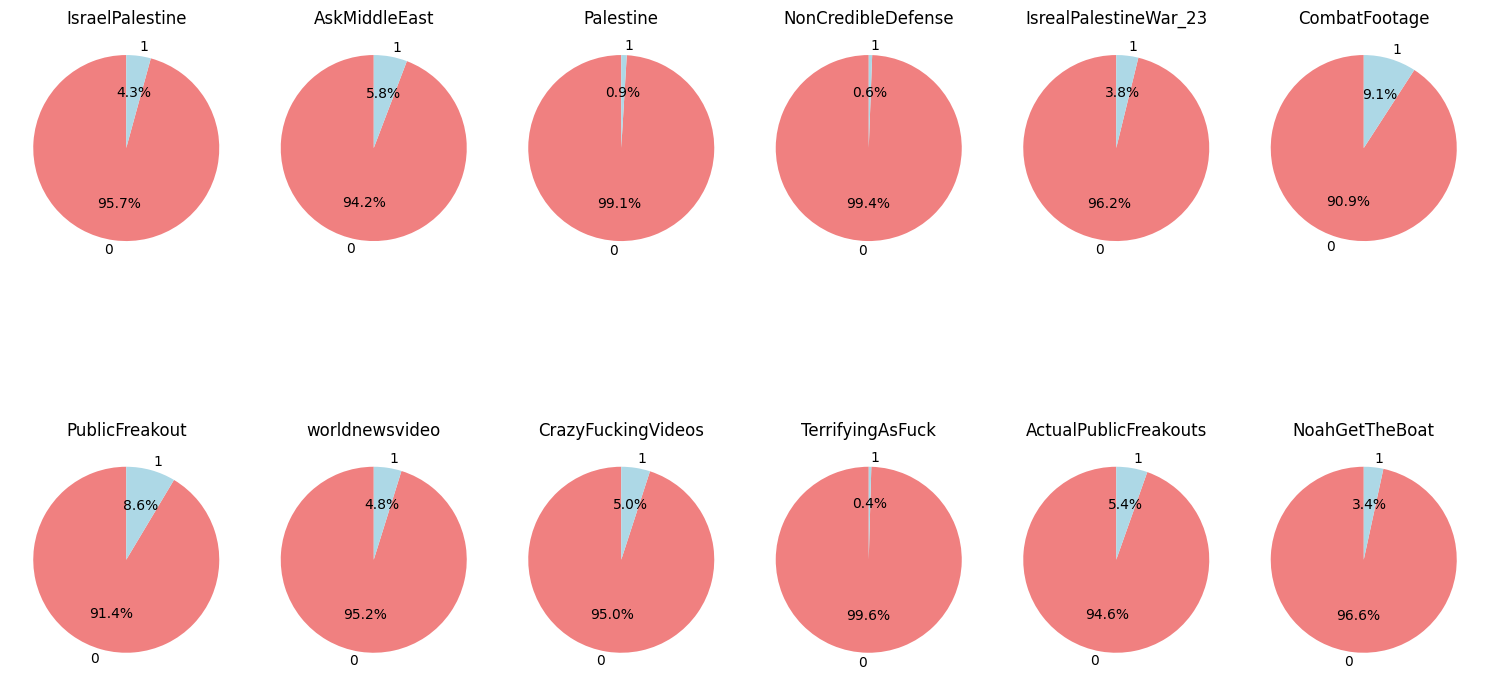

In [72]:
# Calculate controversiality percentages for each subreddit
controversiality_percentages = comment_df.groupby('subreddit')['controversiality'].mean().sort_values(ascending=False)

# Sort subreddits based on the highest comment_id
subreddit_sorted = comment_df.groupby('subreddit')['comment_id'].count().sort_values(ascending=False).index

# Set up subplots
num_subplots = min(12, len(controversiality_percentages))  # Display only 12 charts
num_cols = 6  # Display 6 charts per line
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot pie charts for each subreddit
for i, subreddit in enumerate(subreddit_sorted[:num_subplots]):
    # Filter data for the current subreddit
    subreddit_data = comment_df[comment_df['subreddit'] == subreddit]
    # Calculate controversiality distribution
    controversiality_counts = subreddit_data['controversiality'].value_counts()
    # Plot the pie chart for the current subreddit
    axes[i].pie(controversiality_counts, labels=controversiality_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    axes[i].set_title(f'{subreddit}')

plt.tight_layout()
plt.show()

In [73]:
comment_df[comment_df['controversiality'] == 1].sort_values(by=['score','user_total_karma'], ascending=False).head()[['self_text', 'score', 'user_total_karma', 'controversiality']]

,self_text,score,user_total_karma,controversiality
133481,That’s an awfully large explosion for one car in a dense area,96,600.0,1
133586,Looks like they waited until the target was in between some destroyed buildings and away from people.,91,68085.0,1
133492,"Looks to me like they waited for them to be away from foot traffic and cars, there probably weren't many if any civilian casualties here",75,31058.0,1
649407,"Hamas: kills a thousand Israeli civilians, kidnaps more, hides behind Palestinians to avoid retribution\n\nIsrael: retributes\n\nAmericans: nooooo you have to cease fiiiiiiiire",74,85962.0,1
133512,“We take every effort to avoid civilian casualties” 🙄,74,1134.0,1


In [74]:
comment_df[comment_df['controversiality'] == 0].sort_values(by=['score','user_total_karma'], ascending=False).head()[['self_text', 'score', 'user_total_karma', 'controversiality']]

,self_text,score,user_total_karma,controversiality
617633,And that’s how you create the next generation of fighters. They will never forget.,7584,324779.0,0
645073,Lucky? You sure spell 'Stupid Fuck' in a funny way...,6859,125923.0,0
645071,You are lucky to be alive. Hopefully this helped you remove your head from your ass.,6709,20985.0,0
11265,"There’s state of emergency in effect in Ecuador, the narcos and the military have basically declared an all out war. The cartels even took over a tv station today while live on air.\n\nhttps://preview.redd.it/izy6ey3e3jbc1.jpeg?width=640&amp;format=pjpg&amp;auto=webp&amp;s=47fab8999b14dc4e958a36ce66df1ca49ea81401",5263,179966.0,0
46473,"Everyone knew it was ISIS immediately.\n\nIran just wanted to play the guilt card, but ISIS got jealous of others ""taking credit"" for their work, so they admitted responsibility.",4783,147821.0,0


# **Topic modeling**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
df['self_text'].fillna("", inplace=True)
tfidf_matrix = vectorizer.fit_transform(df['self_text'])
lda_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Assuming 10 topics
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
# Number of words for each topic
no_words_per_topic = 10  
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-no_words_per_topic - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print the topics and related words
for topic_idx, top_words in enumerate(top_words_per_topic):
    print(f"Topic {topic_idx + 1}:")
    print(", ".join(top_words))
    print()

Topic 1:
hamas, civilians, israel, children, people, idf, killed, war, gaza, civilian

Topic 2:
like, just, people, fuck, shit, fucking, good, don, know, man

Topic 3:
hospital, hamas, org, wikipedia, en, wiki, https, al, thank, gaza

Topic 4:
israel, people, genocide, right, anti, palestinians, don, just, jews, zionist

Topic 5:
lol, don, thanks, just, think, point, did, know, said, comment

Topic 6:
money, free, israel, people, hamas, palestine, don, just, like, yeah

Topic 7:
israel, hamas, gaza, palestinians, war, state, west, bank, peace, people

Topic 8:
https, com, www, reddit, source, news, amp, video, link, watch

Topic 9:
like, just, hamas, tunnels, water, idf, air, rockets, israel, hit

Topic 10:
jews, jewish, people, israel, land, arabs, muslims, arab, muslim, religion



In [76]:
# Get the vocabulary indices for 'israel' and 'palestine' in your vectorizer
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']

In [77]:
topic_term_distribution = lda_model.components_
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()

In [78]:
print(f"The topic related with 'israel' is Topic {israel_topic_index + 1}:")
print(", ".join(top_words_per_topic[israel_topic_index]))
print()

# Print the topics related with 'palestine'
print(f"The topic related with 'palestine' is Topic {palestine_topic_index + 1}:")
print(", ".join(top_words_per_topic[palestine_topic_index]))
print()

The topic related with 'israel' is Topic 7:
israel, hamas, gaza, palestinians, war, state, west, bank, peace, people

The topic related with 'palestine' is Topic 7:
israel, hamas, gaza, palestinians, war, state, west, bank, peace, people

